In [1]:
import numpy as np
from tqdm.notebook import tqdm
import requests

from energy import energy_gradient, energy_function_forward, gradient_magnitude_sobel_operator
from seams import seams_map_dp, seam_map_function_forward, carve_column_mask
from seam_carve import SeamCarve

from PIL import Image
from matplotlib import pyplot as plt
import os

In [2]:
url = 'https://static.boredpanda.com/blog/wp-content/uploads/2016/03/hairy-fluffy-cat-sky-the-ragdoll-31.jpg'
img = Image.open(requests.get(url, stream=True).raw)
img.save(os.path.join('images/cat.jpg'))

In [3]:
img_path = 'images/cat.jpg'

old_height = np.array(img).shape[1]
old_width = np.array(img).shape[0]
new_size = (650, 710)

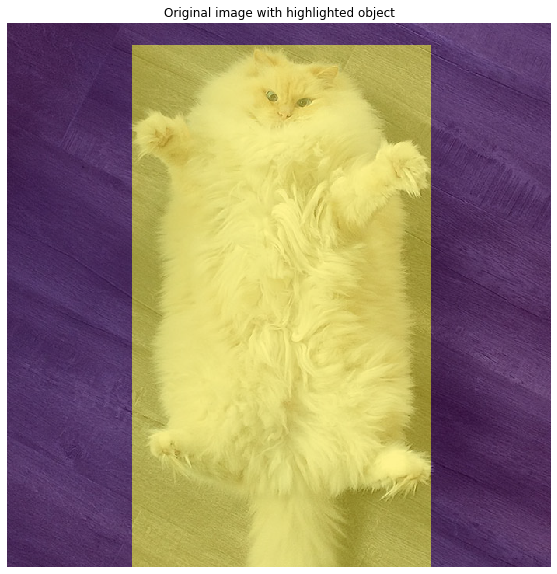

In [4]:
importance_map = np.zeros(np.asarray(img)[:,:,0].shape)

object_border_upper = round(old_height * 0.04)
object_border_bottom = round(old_height)
object_border_left = round(old_width * 0.23)
object_border_right = round(old_width * 0.78)

importance_map[object_border_upper:object_border_bottom, object_border_left:object_border_right] = 1
importance_map_img = Image.fromarray(np.uint8(importance_map), 'L')

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.imshow(importance_map_img, alpha=.5)
plt.axis(False)
plt.title('Original image with highlighted object')
plt.show()

## Energy gradient

In [7]:
sc_dual_grad = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_gradient,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='dual_grad_with_object')

sc_dual_grad.run()

sc_dual_grad.save_result()

plt.imshow(sc_dual_grad.final_image)
plt.axis(False)
plt.show()

In [6]:
# sc_dual_grad.__dict__

In [7]:
np.sum(sc_dual_grad.time_by_step)

109.56342999999995

## Sobel

In [6]:
sc_sobel = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=gradient_magnitude_sobel_operator,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='sobel_with_object')

sc_sobel.run()

sc_sobel.save_result()

plt.imshow(sc_sobel.final_image)
plt.axis(False)
plt.show()

## Forward energy

In [ ]:
sc_forward = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_function_forward,
                seam_map_function=seam_map_function_forward,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='forward_with_object')

sc_forward.run()

sc_forward.save_result()

plt.imshow(sc_forward.final_image)
plt.axis(False)
plt.show()